In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier 
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
# Load the data
import zipfile
import os

# Path to the uploaded ZIP file
zip_path = 'archive.zip'
extract_path = './NSL-KDD'

# Create a directory to extract the ZIP file
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


# Define paths to the train and test datasets
train_path = os.path.join(extract_path, 'KDDTrain+.txt')
test_path = os.path.join(extract_path, 'KDDTest+.txt')

# Column names for the dataset
columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level']# Just renamed class as level.

# Load the train and test datasets
train_data = pd.read_csv(train_path, header=None, names=columns)
test_data = pd.read_csv(test_path, header=None, names=columns)

# Combine train and test datasets for uniform preprocessing
data = pd.concat([train_data, test_data], ignore_index=True)

In [3]:
df = train_data.copy()

In [4]:
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19


# Data Preprocessing

In [5]:
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19


In [6]:
# Step 3: Data Preprocessing 
df.shape

(125973, 43)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [8]:
# Check for the NAN values or Null Values
print(df.sum().isna())

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [9]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
df.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.144650,45566.743000,19779.114421,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.515310,5870331.181891,4021269.151440,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.000000,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


# EDA

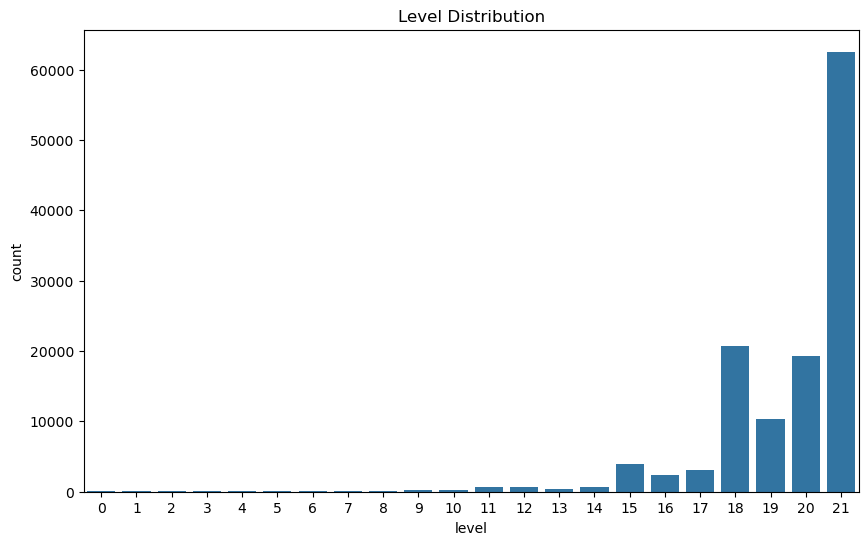

In [11]:
# Visualizing the distribution of Levels
sns.countplot(x='level', data=df)
plt.title('Level Distribution')
plt.show()

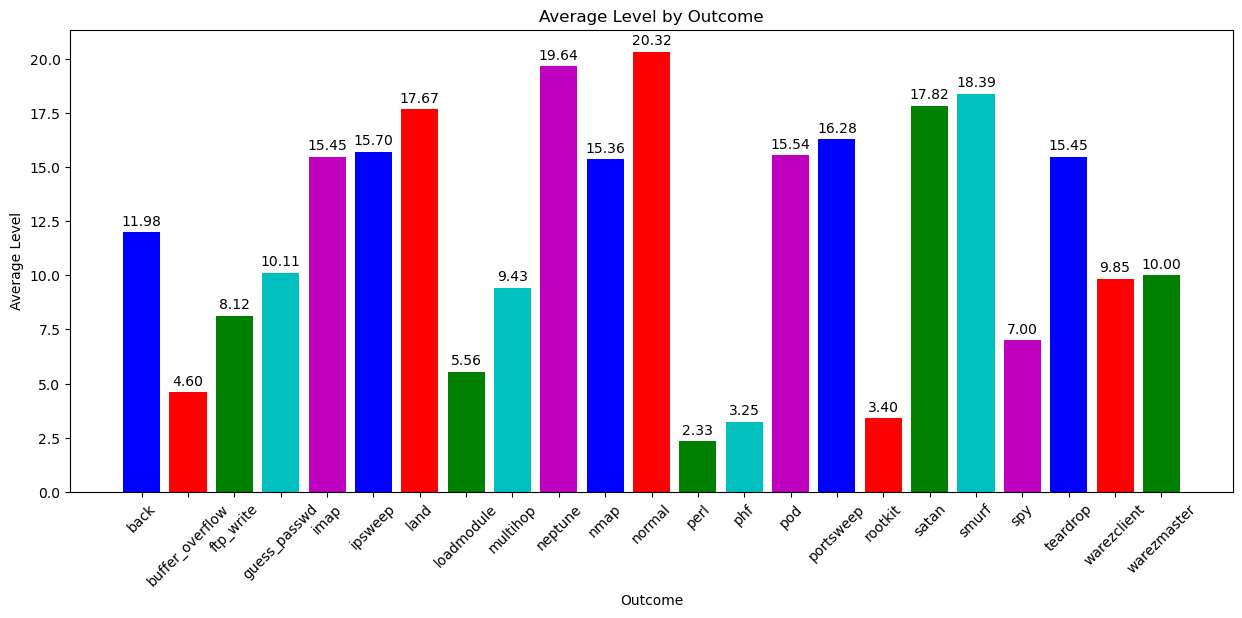

In [12]:
grouped_df = df.groupby('outcome')['level'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(grouped_df['outcome'], grouped_df['level'], color=['b', 'r', 'g', 'c', 'm'])

# Adding labels
ax.set_xlabel('Outcome')
ax.set_ylabel('Average Level')
ax.set_title('Average Level by Outcome')

# Adding data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()


In [13]:
df.loc[df['outcome'] == "normal", "outcome"] = 'normal'
df.loc[df['outcome'] != 'normal', "outcome"] = 'attack'

In [14]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

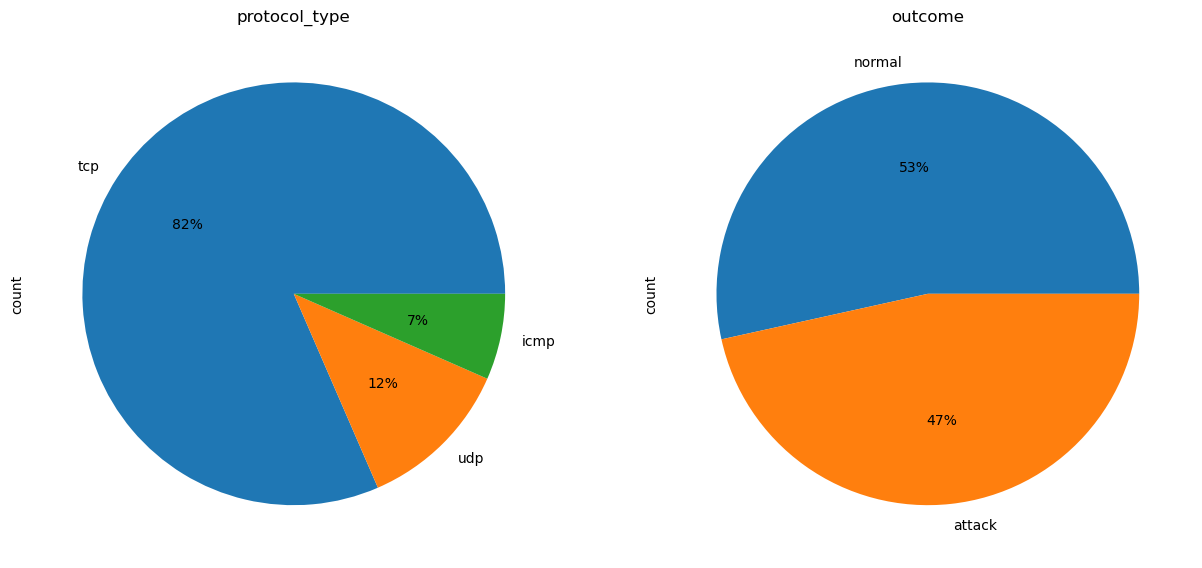

In [15]:
pie_plot(df, ['protocol_type', 'outcome'], 1, 2)

<Figure size 2000x4000 with 0 Axes>

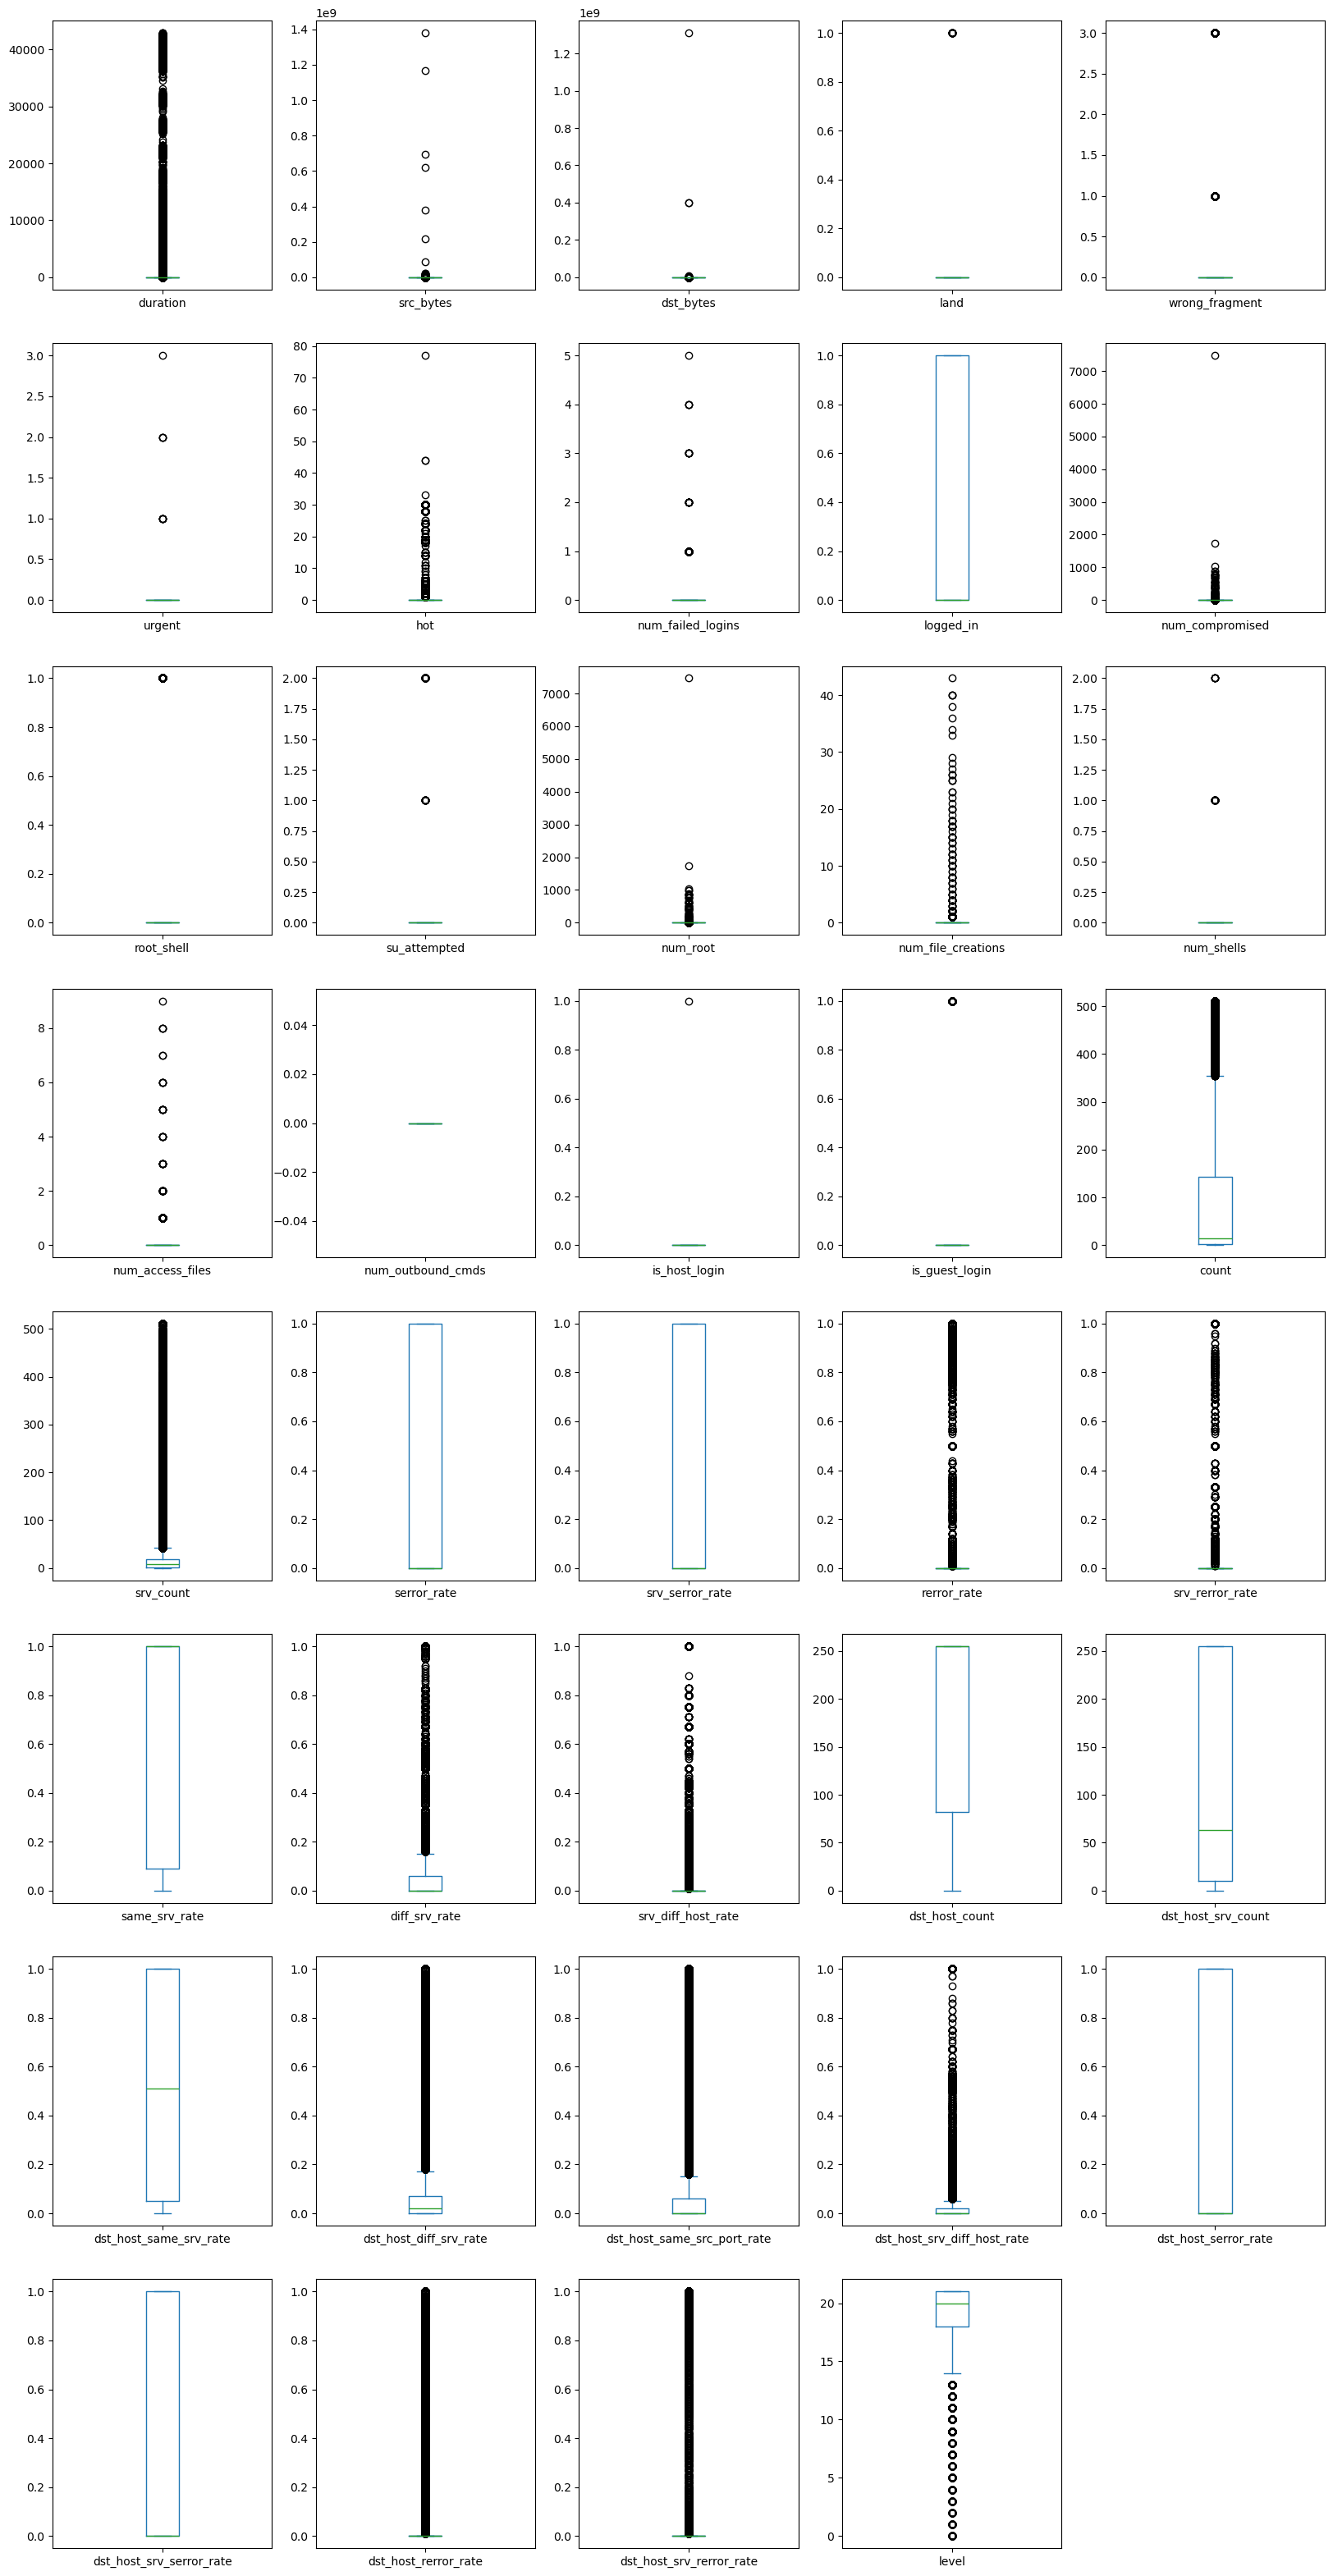

In [16]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

# Scaling

In [17]:
# Preprocessing the dataset
from sklearn.preprocessing import RobustScaler
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe


In [18]:
scaled_data = preprocess(df)

In [19]:
x = scaled_data.drop(['outcome', 'level'], axis=1).values
y = scaled_data['outcome'].values
y_reg = scaled_data['level'].values
pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))
y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)


Number of original features is 122 and of reduced features is 20


In [ ]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
# Save the encoder
joblib.dump(encoder, 'encoder.pkl')

In [20]:
kernal_evals = dict()

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    train_f1 = metrics.f1_score(y_train, model.predict(X_train))
    test_f1 = metrics.f1_score(y_test, model.predict(X_test))
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1, cv_scores]
    
    print(f"Training Accuracy {name}: {train_accuracy*100:.2f}%  Test Accuracy {name}: {test_accuracy*100:.2f}%")
    print(f"Training Precision {name}: {train_precision*100:.2f}%  Test Precision {name}: {test_precision*100:.2f}%")
    print(f"Training Recall {name}: {train_recall*100:.2f}%  Test Recall {name}: {test_recall*100:.2f}%")
    print(f"Training F1-score {name}: {train_f1*100:.2f}%  Test F1-score {name}: {test_f1*100:.2f}%")
    print(f"Cross-Validation Score {name}: {cv_scores*100:.2f}%")
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal', 'attack'])
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(False)
    cm_display.plot(ax=ax)
    plt.show()
    
    return predicted

def predict_new_data(model, X_new):
    return model.predict(X_new)

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Evaluating models on the original feature set:
Training Accuracy Random Classifier: 49.87%  Test Accuracy Random Classifier: 50.32%
Training Precision Random Classifier: 46.60%  Test Precision Random Classifier: 47.08%
Training Recall Random Classifier: 49.96%  Test Recall Random Classifier: 49.80%
Training F1-score Random Classifier: 48.07%  Test F1-score Random Classifier: 48.84%
Cross-Validation Score Random Classifier: 50.17%


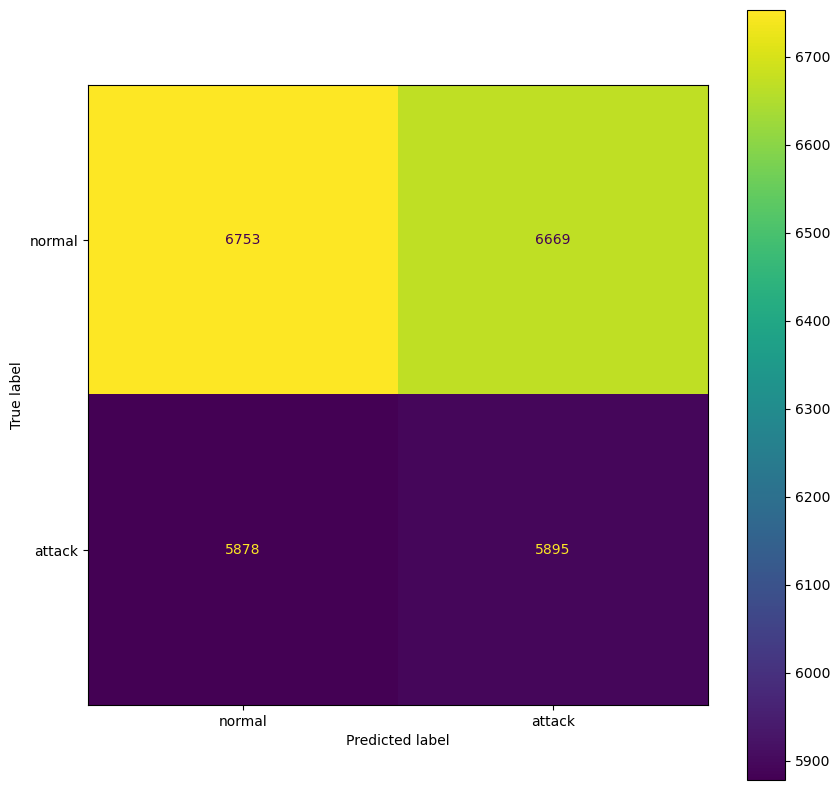

Evaluating models on the reduced feature set:
Training Accuracy Random Classifier: 50.24%  Test Accuracy Random Classifier: 49.87%
Training Precision Random Classifier: 46.39%  Test Precision Random Classifier: 47.30%
Training Recall Random Classifier: 50.13%  Test Recall Random Classifier: 49.26%
Training F1-score Random Classifier: 48.29%  Test F1-score Random Classifier: 48.66%
Cross-Validation Score Random Classifier: 50.12%


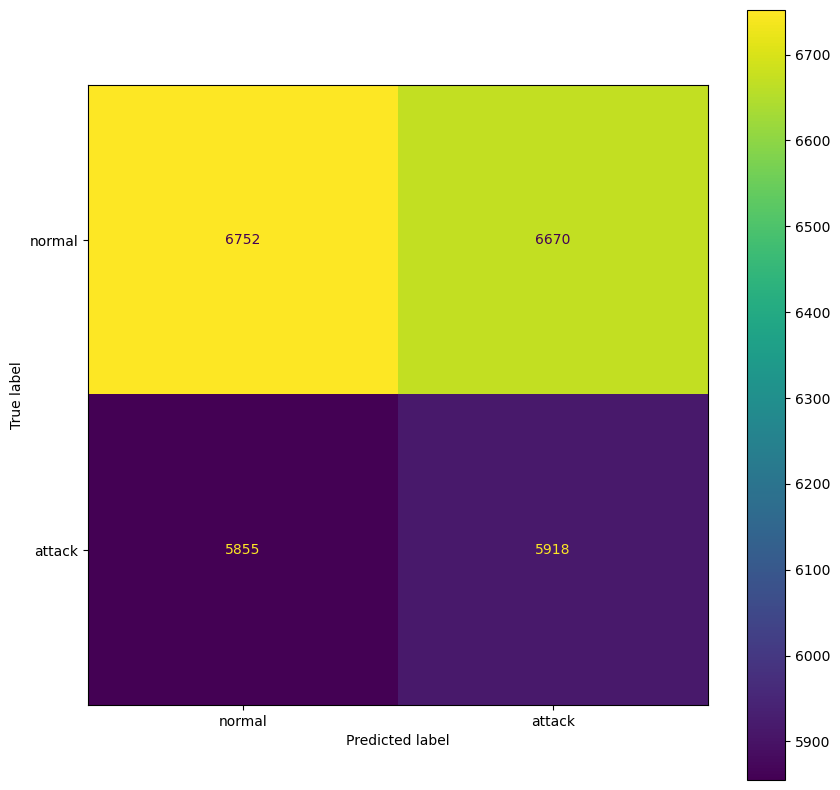

                   Train Accuracy  Test Accuracy  Train Precision  \
Random Classifier           0.502          0.499            0.464   

                   Test Precision  Train Recall  Test Recall  Train F1-score  \
Random Classifier           0.473         0.501        0.493           0.483   

                   Test F1-score  Cross-Validation Score  
Random Classifier          0.487                   0.501  


In [22]:
# Initialize the models
models = {
    "Random Classifier": DummyClassifier(strategy='uniform')
}

# Evaluate the models on the original feature set
print("Evaluating models on the original feature set:")
for name, model in models.items():
    evaluate_classification(model, name, x_train, x_test, y_train, y_test)

# Evaluate the models on the reduced feature set
print("Evaluating models on the reduced feature set:")
for name, model in models.items():
    evaluate_classification(model, name, x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

# Display the evaluation results
eval_df = pd.DataFrame.from_dict(kernal_evals, orient='index', columns=['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1-score', 'Test F1-score', 'Cross-Validation Score'])
print(eval_df)

Evaluating models on the original feature set:
Training Accuracy Multilayer Perceptron: 98.59%  Test Accuracy Multilayer Perceptron: 98.50%
Training Precision Multilayer Perceptron: 98.25%  Test Precision Multilayer Perceptron: 98.28%
Training Recall Multilayer Perceptron: 98.73%  Test Recall Multilayer Perceptron: 98.51%
Training F1-score Multilayer Perceptron: 98.49%  Test F1-score Multilayer Perceptron: 98.40%
Cross-Validation Score Multilayer Perceptron: 97.94%


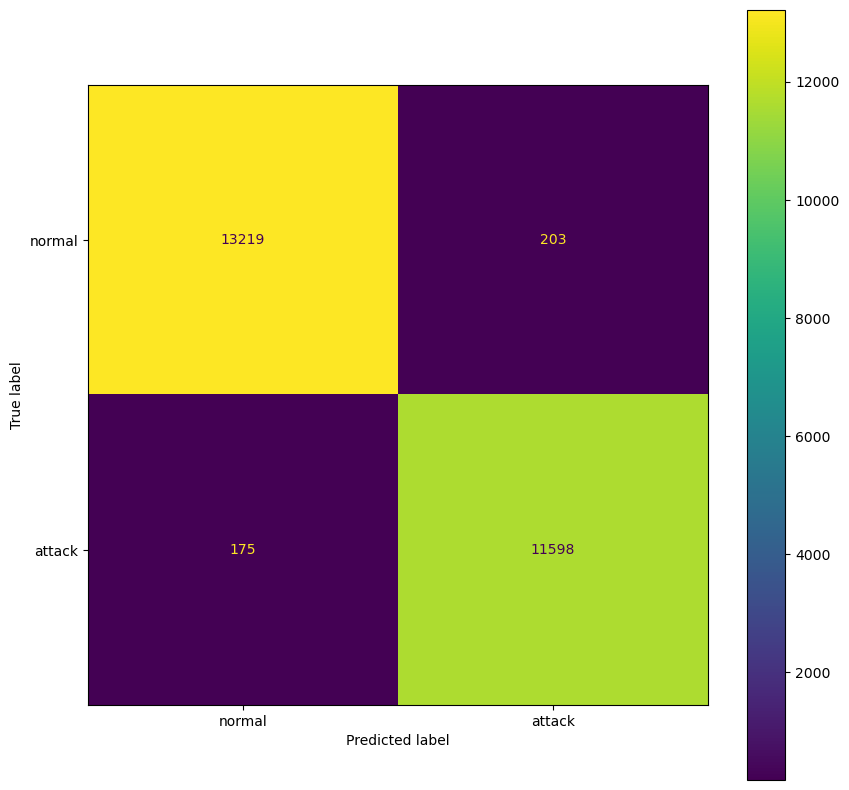

Evaluating models on the reduced feature set:
Training Accuracy Multilayer Perceptron: 97.21%  Test Accuracy Multilayer Perceptron: 97.02%
Training Precision Multilayer Perceptron: 96.13%  Test Precision Multilayer Perceptron: 96.03%
Training Recall Multilayer Perceptron: 97.95%  Test Recall Multilayer Perceptron: 97.67%
Training F1-score Multilayer Perceptron: 97.03%  Test F1-score Multilayer Perceptron: 96.84%
Cross-Validation Score Multilayer Perceptron: 96.95%


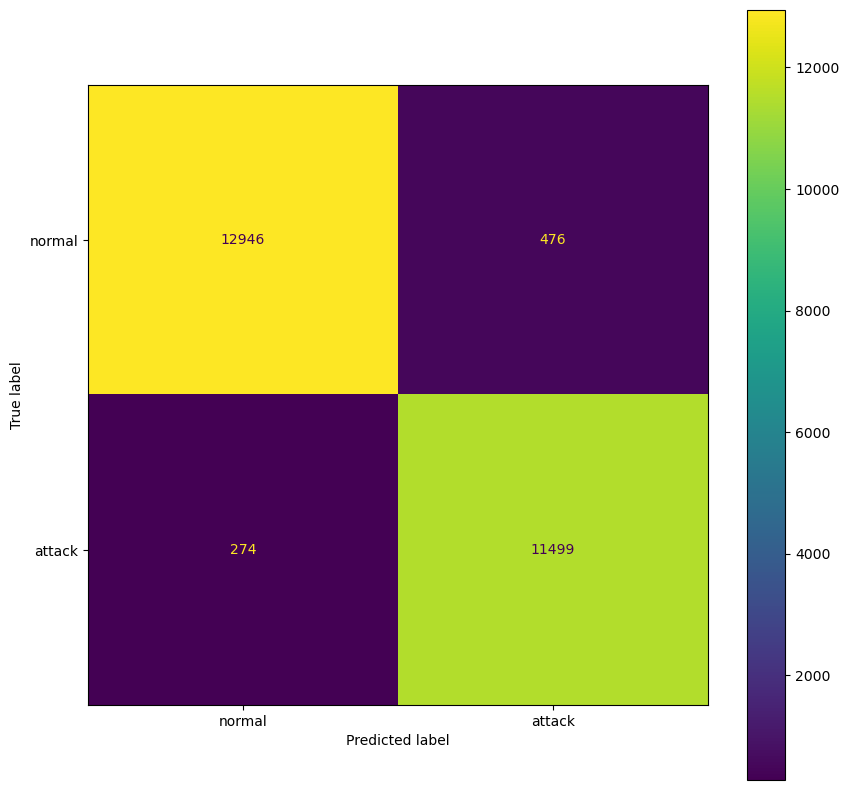

                       Train Accuracy  Test Accuracy  Train Precision  \
Random Classifier               0.502          0.499            0.464   
Multilayer Perceptron           0.972          0.970            0.961   

                       Test Precision  Train Recall  Test Recall  \
Random Classifier               0.473         0.501        0.493   
Multilayer Perceptron           0.960         0.979        0.977   

                       Train F1-score  Test F1-score  Cross-Validation Score  
Random Classifier               0.483          0.487                   0.501  
Multilayer Perceptron           0.970          0.968                   0.970  


In [23]:
    
models = {
    "Multilayer Perceptron": MLPClassifier(hidden_layer_sizes=(10,), max_iter=10)
}

# Evaluate the models on the original feature set
print("Evaluating models on the original feature set:")
for name, model in models.items():
    evaluate_classification(model, name, x_train, x_test, y_train, y_test)

# Evaluate the models on the reduced feature set
print("Evaluating models on the reduced feature set:")
for name, model in models.items():
    evaluate_classification(model, name, x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

# Display the evaluation results
eval_df = pd.DataFrame.from_dict(kernal_evals, orient='index', columns=['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1-score', 'Test F1-score', 'Cross-Validation Score'])
print(eval_df)               

Evaluating models on the original feature set:
Training Accuracy Logistic Regression: 89.22%  Test Accuracy Logistic Regression: 88.77%
Training Precision Logistic Regression: 88.78%  Test Precision Logistic Regression: 88.47%
Training Recall Logistic Regression: 87.92%  Test Recall Logistic Regression: 87.35%
Training F1-score Logistic Regression: 88.35%  Test F1-score Logistic Regression: 87.91%
Cross-Validation Score Logistic Regression: 88.99%


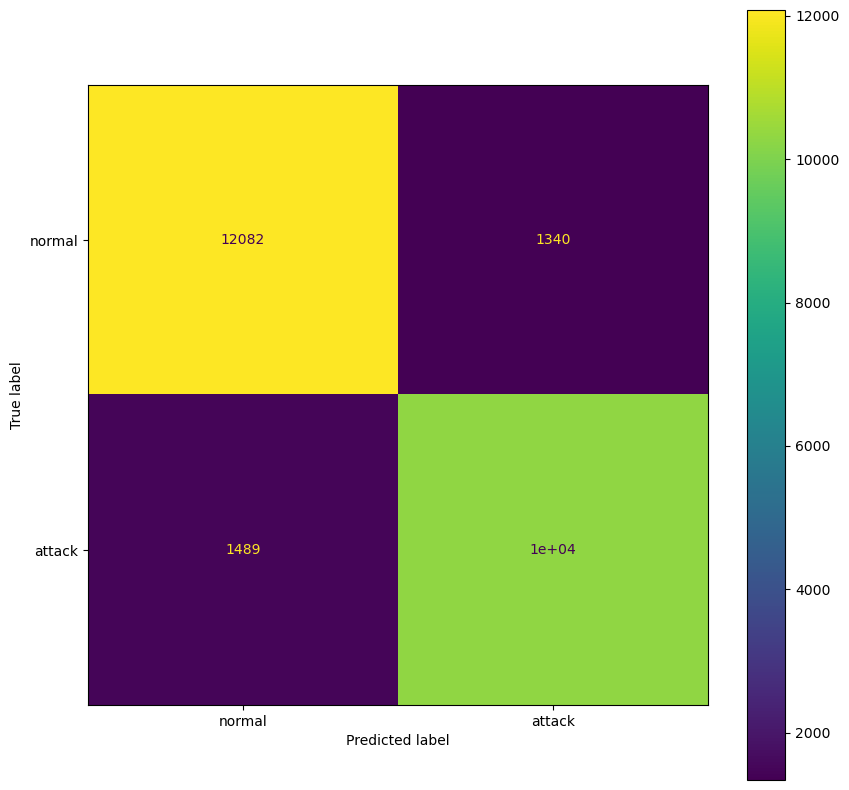

Evaluating models on the reduced feature set:
Training Accuracy Logistic Regression: 90.95%  Test Accuracy Logistic Regression: 90.54%
Training Precision Logistic Regression: 90.59%  Test Precision Logistic Regression: 90.22%
Training Recall Logistic Regression: 89.86%  Test Recall Logistic Regression: 89.45%
Training F1-score Logistic Regression: 90.22%  Test F1-score Logistic Regression: 89.83%
Cross-Validation Score Logistic Regression: 90.02%


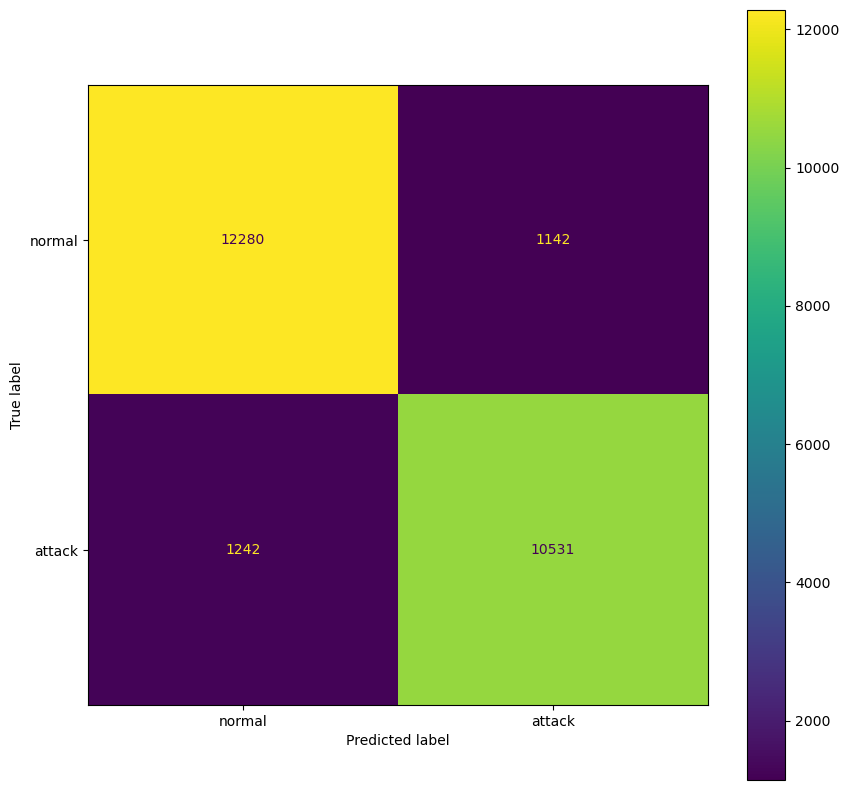

                       Train Accuracy  Test Accuracy  Train Precision  \
Random Classifier               0.502          0.499            0.464   
Multilayer Perceptron           0.972          0.970            0.961   
Logistic Regression             0.909          0.905            0.906   

                       Test Precision  Train Recall  Test Recall  \
Random Classifier               0.473         0.501        0.493   
Multilayer Perceptron           0.960         0.979        0.977   
Logistic Regression             0.902         0.899        0.895   

                       Train F1-score  Test F1-score  Cross-Validation Score  
Random Classifier               0.483          0.487                   0.501  
Multilayer Perceptron           0.970          0.968                   0.970  
Logistic Regression             0.902          0.898                   0.900  


In [24]:
    
models = {
    "Logistic Regression": LogisticRegression()
}

# Evaluate the models on the original feature set
print("Evaluating models on the original feature set:")
for name, model in models.items():
    evaluate_classification(model, name, x_train, x_test, y_train, y_test)

# Evaluate the models on the reduced feature set
print("Evaluating models on the reduced feature set:")
for name, model in models.items():
    evaluate_classification(model, name, x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

# Display the evaluation results
eval_df = pd.DataFrame.from_dict(kernal_evals, orient='index', columns=['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1-score', 'Test F1-score', 'Cross-Validation Score'])
print(eval_df)               

In [60]:
import joblib
import boto3
from sklearn.neural_network import MLPClassifier

# Initialize and train the model
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10)
mlp_model.fit(x_train_reduced, y_train_reduced)  # Replace with your training data

# Save the model locally
model_name = 'mlp_classifier.pkl'
joblib.dump(mlp_model, model_name)

# Upload the model to S3
s3 = boto3.client('s3')
bucket_name = 'zebasbucket'
s3_key = f'models/{model_name}'

try:
    s3.upload_file(model_name, bucket_name, s3_key)
    print(f"Model uploaded to S3 bucket '{bucket_name}' under the key '{s3_key}'")
except Exception as e:
    print(f"An error occurred: {e}")


Model uploaded to S3 bucket 'zebasbucket' under the key 'models/mlp_classifier.pkl'
